In [10]:
import matplotlib.pyplot as plt
import numpy as np

from helpers import read_mnist, format_data, iterate_minibatches, split_data, accuracy, dump_nn, load_nn
from nn import NeuralNetwork

# Read data

In [2]:
ims, labels, a, t = read_mnist()

In [3]:
X, y = format_data(ims, labels)

In [4]:
X_train, y_train, X_val, y_val = split_data(X, y, percentage=80)

## Test training

In [5]:
nn = NeuralNetwork(layers=[784, 400, 200, 10])

In [6]:
from tqdm import tqdm
epochs = 200
batch_size = 100

accuracy_train = []
accuracy_val = []
t = tqdm(range(epochs), leave=False)
for i in t:
    for batch in iterate_minibatches(X_train, y_train, batch_size):
        x_batch, y_batch = batch
        nn.backward(x_batch, y_batch, momentum=0.9)
        
    # Train accuracy.
    yhat_train, _, _ = nn.forward(X_train)
    acc_train = accuracy(yhat_train, y_train)
    accuracy_train.append(acc_train)

    # Validation accuracy.
    yhat_val, _, _ = nn.forward(X_val)
    acc_val = accuracy(yhat_val, y_val)
    accuracy_val.append(acc_val)

    t.set_description("Train acc.:{:.2f}, Val acc.:{:.2f}".format(acc_train, acc_val))

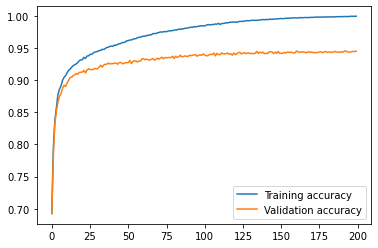

In [7]:
plt.figure()
plt.plot(accuracy_train, label="Training accuracy")
plt.plot(accuracy_val, label="Validation accuracy")
plt.legend()
plt.show()

## Dump network to file

In [8]:
dump_nn(nn, 'best_nn.pkl')

## Test dumped network works

In [11]:
best_nn = load_nn('best_nn.pkl')

In [13]:
# Validation accuracy.
yhat_val, _, _ = best_nn.forward(X_val)
print('Validation accuracy:', accuracy(yhat_val, y_val))

Validation accuracy: 0.945
